# **Exploratory Data Analysis**

In [96]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,8
import warnings
warnings.filterwarnings("ignore")

In [98]:
monday.head()

,customer_no,location
timestamp,,
2019-02-09 07:03:00,1,dairy
2019-02-09 07:03:00,2,dairy
2019-02-09 07:04:00,3,dairy
2019-02-09 07:04:00,4,dairy
2019-02-09 07:04:00,5,spices


In [6]:
tuesday.head()

,customer_no,location
timestamp,,
2019-09-03 07:02:00,1,fruit
2019-09-03 07:02:00,2,drinks
2019-09-03 07:03:00,3,dairy
2019-09-03 07:05:00,1,drinks
2019-09-03 07:06:00,4,dairy


In [21]:
wednesday.head()

,customer_no,location
timestamp,,
2019-04-09 07:00:00,1,fruit
2019-04-09 07:00:00,2,dairy
2019-04-09 07:00:00,3,fruit
2019-04-09 07:00:00,4,fruit
2019-04-09 07:00:00,5,dairy


In [22]:
thursday.head()

,customer_no,location
timestamp,,
2019-05-09 07:00:00,1,drinks
2019-05-09 07:01:00,2,fruit
2019-05-09 07:01:00,3,dairy
2019-05-09 07:01:00,4,dairy
2019-05-09 07:02:00,1,checkout


In [23]:
friday.head()

,customer_no,location
timestamp,,
2019-06-09 07:00:00,1,dairy
2019-06-09 07:00:00,2,drinks
2019-06-09 07:00:00,3,fruit
2019-06-09 07:01:00,2,checkout
2019-06-09 07:01:00,4,drinks


In [99]:
print(monday.shape)
print(tuesday.shape)
print(wednesday.shape)
print(thursday.shape)
print(friday.shape)

(4884, 2)
(4714, 2)
(5050, 2)
(5104, 2)
(5125, 2)


In [100]:
all_files = glob.glob("*.csv")
df = pd.concat((pd.read_csv(f,sep=';') for f in all_files))
df.index = pd.to_datetime(df.index)
df

,timestamp,customer_no,location
1970-01-01 00:00:00.000000000,2019-09-06 07:00:00,1,dairy
1970-01-01 00:00:00.000000001,2019-09-06 07:00:00,2,drinks
1970-01-01 00:00:00.000000002,2019-09-06 07:00:00,3,fruit
1970-01-01 00:00:00.000000003,2019-09-06 07:01:00,2,checkout
1970-01-01 00:00:00.000000004,2019-09-06 07:01:00,4,drinks
...,...,...,...
1970-01-01 00:00:00.000005045,2019-09-04 21:48:00,1528,spices
1970-01-01 00:00:00.000005046,2019-09-04 21:49:00,1520,dairy
1970-01-01 00:00:00.000005047,2019-09-04 21:49:00,1529,dairy
1970-01-01 00:00:00.000005048,2019-09-04 21:49:00,1530,fruit


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24877 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000005049
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    24877 non-null  object
 1   customer_no  24877 non-null  int64 
 2   location     24877 non-null  object
dtypes: int64(1), object(2)
memory usage: 777.4+ KB


In [102]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df['year']= df['timestamp'].dt.year
df['month']= df['timestamp'].dt.month
df['week']= df['timestamp'].dt.week
df['weekday']= df['timestamp'].dt.weekday
df['day']= df['timestamp'].dt.day
df['hour']= df['timestamp'].dt.hour
df['minutes']= df['timestamp'].dt.minute
df['seconds']= df['timestamp'].dt.second


df.loc[df["weekday"] == 0, "weekday"] = 'monday'
df.loc[df["weekday"] == 1, "weekday"] = 'tuesday'
df.loc[df["weekday"] == 2, "weekday"] = 'wednesday'
df.loc[df["weekday"] == 3, "weekday"] = 'thursday'
df.loc[df["weekday"] == 4, "weekday"] = 'friday'

df = df.sort_values(['timestamp'])

Calculate the total number of customers in each section

In [103]:
total_customers = pd.DataFrame(df.groupby(['timestamp','location','weekday'])['customer_no'].count()).reset_index()

In [104]:
total_customers

,timestamp,location,weekday,customer_no
0,2019-09-02 07:03:00,dairy,monday,2
1,2019-09-02 07:04:00,dairy,monday,2
2,2019-09-02 07:04:00,fruit,monday,1
3,2019-09-02 07:04:00,spices,monday,3
4,2019-09-02 07:05:00,checkout,monday,2
...,...,...,...,...
13834,2019-09-06 21:50:00,checkout,friday,2
13835,2019-09-06 21:50:00,dairy,friday,1
13836,2019-09-06 21:50:00,drinks,friday,1
13837,2019-09-06 21:50:00,fruit,friday,1


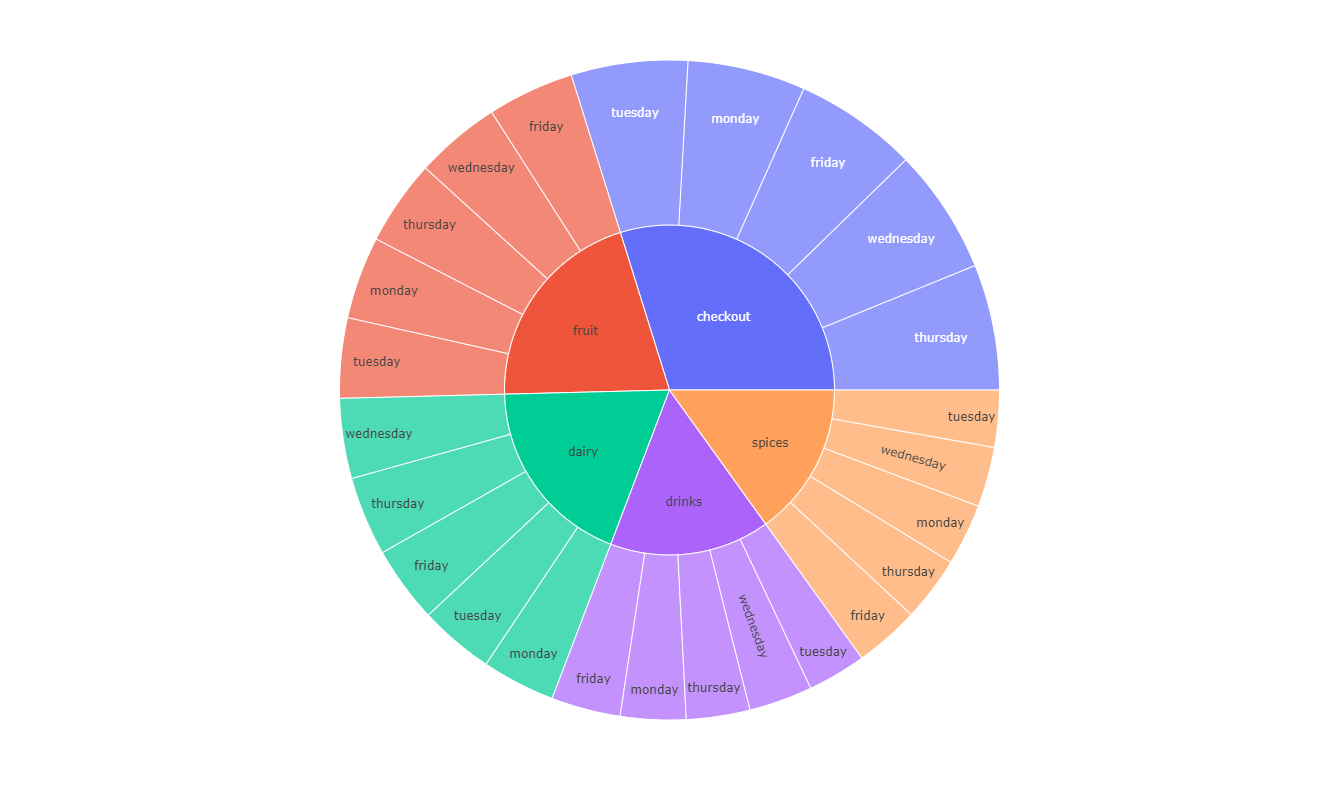

In [105]:
import plotly.express as px
fig = px.sunburst(total_customers, path=['location','weekday'], values='customer_no', height=800)
fig.show()

<AxesSubplot:ylabel='location'>

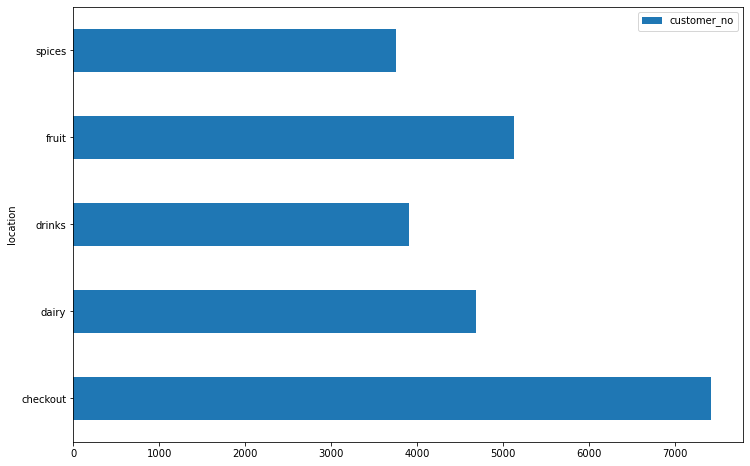

In [141]:
total_customers_location=pd.DataFrame(df.groupby('location')['customer_no'].count())
total_customers_location.plot(kind='barh',ylabel='number of customers')

In [114]:
df.weekday.unique()

array(['monday', 'tuesday', 'wednesday', 'thursday', 'friday'],
      dtype=object)

In [115]:
df_unstack = df.groupby('timestamp')['location'].value_counts().fillna(0)
df_unstack

timestamp            location
2019-09-02 07:03:00  dairy       2
2019-09-02 07:04:00  spices      3
                     dairy       2
                     fruit       1
2019-09-02 07:05:00  checkout    2
                                ..
2019-09-06 21:50:00  checkout    2
                     dairy       1
                     drinks      1
                     fruit       1
                     spices      1
Name: location, Length: 13839, dtype: int64

In [116]:
customers_per_time=pd.DataFrame(df.groupby(['timestamp','location','weekday','hour'])['customer_no'].count()).reset_index()
customers_per_time.head(10)

,timestamp,location,weekday,hour,customer_no
0,2019-09-02 07:03:00,dairy,monday,7,2
1,2019-09-02 07:04:00,dairy,monday,7,2
2,2019-09-02 07:04:00,fruit,monday,7,1
3,2019-09-02 07:04:00,spices,monday,7,3
4,2019-09-02 07:05:00,checkout,monday,7,2
5,2019-09-02 07:05:00,dairy,monday,7,1
6,2019-09-02 07:05:00,drinks,monday,7,1
7,2019-09-02 07:06:00,checkout,monday,7,2
8,2019-09-02 07:06:00,dairy,monday,7,2
9,2019-09-02 07:06:00,drinks,monday,7,1


[Text(0.5, 1.0, 'total number of customers in each section over time')]

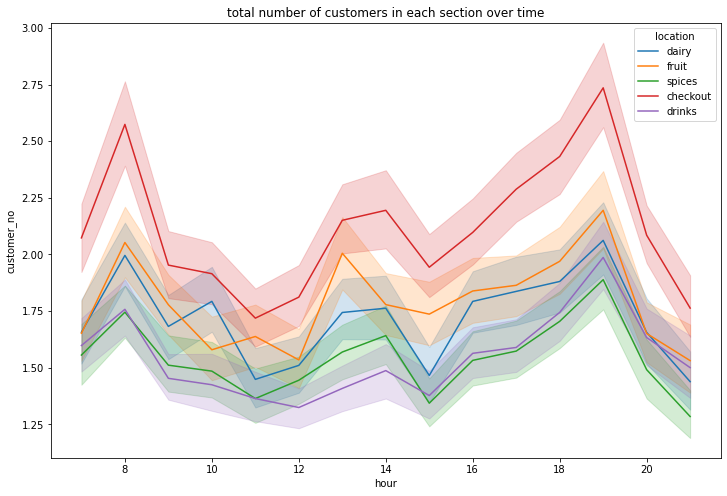

In [110]:
sns.lineplot(data=customers_per_time,x=customers_per_time['hour'],y=customers_per_time['customer_no'], hue=customers_per_time['location']).set(title='total number of customers in each section over time')

Display the number of customers at checkout over time

In [111]:
customer_at_checkout=customers_per_time[customers_per_time['location']=='checkout']
customer_at_checkout

,timestamp,location,weekday,hour,customer_no
4,2019-09-02 07:05:00,checkout,monday,7,2
7,2019-09-02 07:06:00,checkout,monday,7,2
12,2019-09-02 07:07:00,checkout,monday,7,1
16,2019-09-02 07:08:00,checkout,monday,7,3
18,2019-09-02 07:09:00,checkout,monday,7,1
...,...,...,...,...,...
13813,2019-09-06 21:37:00,checkout,friday,21,1
13821,2019-09-06 21:45:00,checkout,friday,21,1
13825,2019-09-06 21:47:00,checkout,friday,21,2
13828,2019-09-06 21:48:00,checkout,friday,21,2


[Text(0.5, 1.0, 'number of customers at checkout over time')]

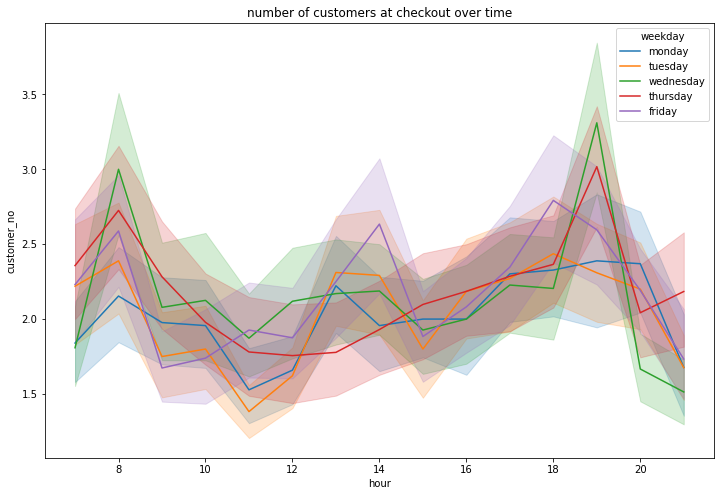

In [112]:
sns.lineplot(data=customer_at_checkout,x=customer_at_checkout['hour'],y=customer_at_checkout['customer_no'], hue=customer_at_checkout['weekday']).set(title='number of customers at checkout over time')

# **Time Each Customer Spent In Market**

In [117]:
df1=df[['timestamp','weekday','hour','location','customer_no']]
df1['uniqueID']=df['weekday']+df['customer_no'].astype(str)

In [118]:
df1 = df1.sort_values(['customer_no','timestamp']).reset_index()
df1['timespent'] = df1.groupby('uniqueID')['timestamp'].diff()

In [119]:
df1=pd.DataFrame(df1)

In [120]:
df1['timespent']

0                   NaT
1       0 days 00:02:00
2                   NaT
3       0 days 00:03:00
4       0 days 00:07:00
              ...      
24872               NaT
24873               NaT
24874   0 days 00:01:00
24875               NaT
24876   0 days 00:01:00
Name: timespent, Length: 24877, dtype: timedelta64[ns]

In [121]:
df1['uniqueID'].count()

24877

In [122]:
df1[df1['uniqueID']=='friday2']

,index,timestamp,weekday,hour,location,customer_no,uniqueID,timespent
22,1970-01-01 00:00:00.000000001,2019-09-06 07:00:00,friday,7,drinks,2,friday2,NaT
23,1970-01-01 00:00:00.000000003,2019-09-06 07:01:00,friday,7,checkout,2,friday2,0 days 00:01:00


In [123]:
time_spent_in_market= df1.groupby(['weekday','uniqueID'])['timestamp'].apply(lambda x: x.max() - x.min()).dt.seconds/60
time_spent_in_market=pd.DataFrame(time_spent_in_market).reset_index()
time_spent_in_market

,weekday,uniqueID,timestamp
0,friday,friday1,5.0
1,friday,friday10,5.0
2,friday,friday100,1.0
3,friday,friday1000,1.0
4,friday,friday1001,10.0
...,...,...,...
7440,wednesday,wednesday995,28.0
7441,wednesday,wednesday996,11.0
7442,wednesday,wednesday997,22.0
7443,wednesday,wednesday998,6.0


In [124]:
time_spent_in_market[time_spent_in_market['uniqueID']=='monday1']

,weekday,uniqueID,timestamp
1510,monday,monday1,2.0


Calculate the total number of customers in the supermarket over time

In [125]:
dff=df[['year','month','week','weekday','hour','minutes','customer_no']]
dff['uniqueID']=df['weekday']+df['customer_no'].astype(str)
dff.drop_duplicates(subset='uniqueID', keep="last",inplace=True)

In [126]:
dff['totalcustomers'] = np.where(dff.uniqueID.is_unique,dff.uniqueID.is_unique,1)

In [127]:
dff.reset_index()

,index,year,month,week,weekday,hour,minutes,customer_no,uniqueID,totalcustomers
0,1970-01-01 00:00:00.000000008,2019,9,36,monday,7,5,1,monday1,1
1,1970-01-01 00:00:00.000000009,2019,9,36,monday,7,5,5,monday5,1
2,1970-01-01 00:00:00.000000013,2019,9,36,monday,7,6,3,monday3,1
3,1970-01-01 00:00:00.000000012,2019,9,36,monday,7,6,2,monday2,1
4,1970-01-01 00:00:00.000000020,2019,9,36,monday,7,7,8,monday8,1
...,...,...,...,...,...,...,...,...,...,...
7440,1970-01-01 00:00:00.000005123,2019,9,36,friday,21,50,1509,friday1509,1
7441,1970-01-01 00:00:00.000005121,2019,9,36,friday,21,50,1507,friday1507,1
7442,1970-01-01 00:00:00.000005122,2019,9,36,friday,21,50,1508,friday1508,1
7443,1970-01-01 00:00:00.000005119,2019,9,36,friday,21,50,1496,friday1496,1


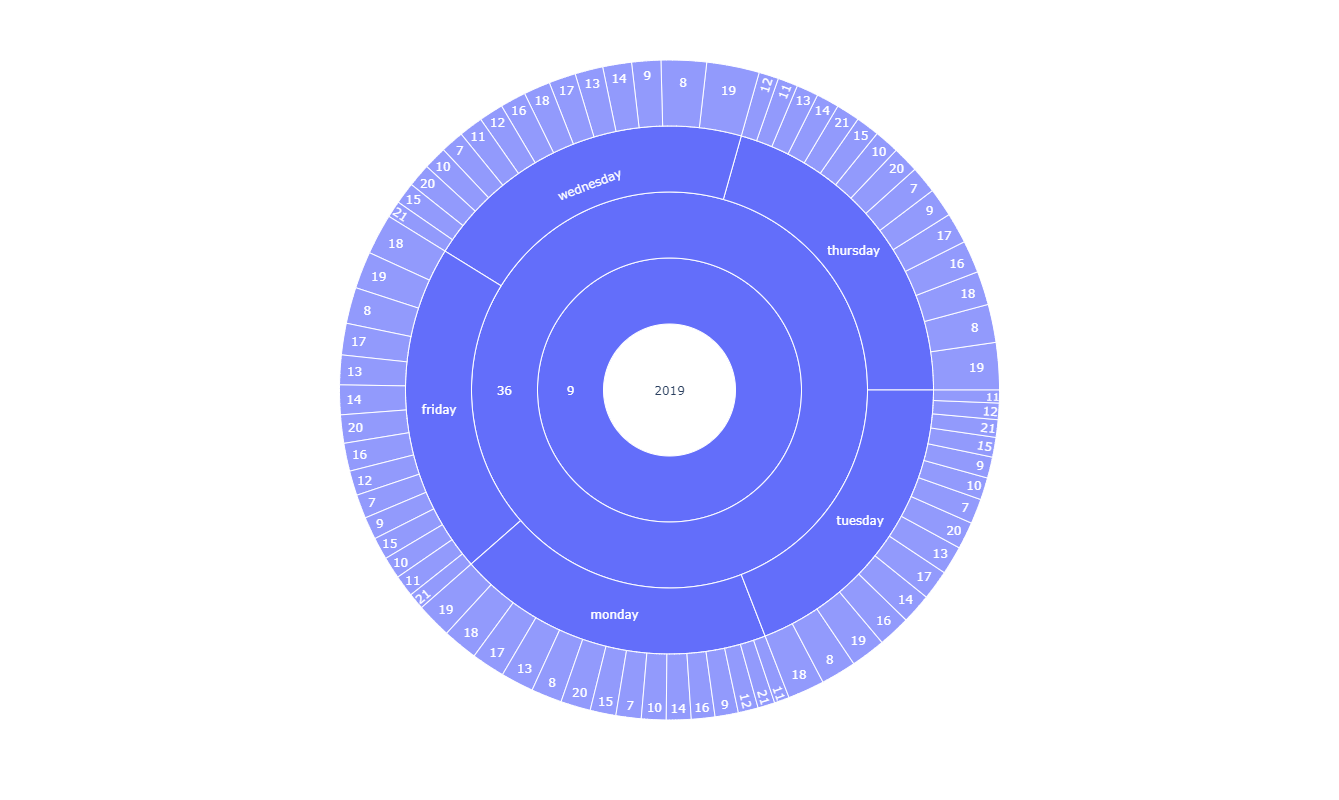

In [130]:
fig = px.sunburst(dff, path=['year','month','week','weekday','hour'], values='totalcustomers',height=800)
fig.show()

# **Transition Probability Matrix & Markov Chain Monte Carlo Simulation (MCMC)**

In [131]:
dt=df[['timestamp','weekday','hour','customer_no','location']]
dt['uniqueID']=df['weekday']+df['customer_no'].astype(str)
dt = dt.sort_values(['customer_no','timestamp'])
dt.groupby('uniqueID')
dt = dt.reindex(columns=['timestamp','weekday','hour','customer_no','uniqueID','location'])
dt=dt.set_index('timestamp')
dt['newlocation']=dt['location'].shift(-1).bfill()
dt

,weekday,hour,customer_no,uniqueID,location,newlocation
timestamp,,,,,,
2019-09-02 07:03:00,monday,7,1,monday1,dairy,checkout
2019-09-02 07:05:00,monday,7,1,monday1,checkout,fruit
2019-09-03 07:02:00,tuesday,7,1,tuesday1,fruit,drinks
2019-09-03 07:05:00,tuesday,7,1,tuesday1,drinks,checkout
2019-09-03 07:12:00,tuesday,7,1,tuesday1,checkout,fruit
...,...,...,...,...,...,...
2019-09-05 21:48:00,thursday,21,1533,thursday1533,dairy,fruit
2019-09-05 21:48:00,thursday,21,1534,thursday1534,fruit,checkout
2019-09-05 21:49:00,thursday,21,1534,thursday1534,checkout,spices


In [133]:
d =pd.crosstab(dt['location'],dt['newlocation'])
d

newlocation,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,0,2135,1133,2804,1344
dairy,1825,1,1046,889,918
drinks,2096,106,2,855,846
fruit,2555,1221,697,3,646
spices,941,1215,1027,571,0


In [134]:
dtt=df[['timestamp','weekday','hour','customer_no','location']]
dtt['uniqueID']=dtt['weekday']+dtt['customer_no'].astype(str)
dtt = dtt.sort_values(['uniqueID','timestamp'],ascending=True)
dtt = dtt.reindex(columns=['timestamp','weekday','hour','customer_no','uniqueID','location'])
dtt=dtt.set_index('timestamp')
dtt.resample

<bound method DataFrame.resample of                        weekday  hour  customer_no      uniqueID  location
timestamp                                                                
2019-09-06 07:00:00     friday     7            1       friday1     dairy
2019-09-06 07:04:00     friday     7            1       friday1    spices
2019-09-06 07:05:00     friday     7            1       friday1  checkout
2019-09-06 07:06:00     friday     7           10      friday10     fruit
2019-09-06 07:11:00     friday     7           10      friday10  checkout
...                        ...   ...          ...           ...       ...
2019-09-04 16:53:00  wednesday    16          998  wednesday998     dairy
2019-09-04 16:57:00  wednesday    16          998  wednesday998     fruit
2019-09-04 16:59:00  wednesday    16          998  wednesday998  checkout
2019-09-04 16:53:00  wednesday    16          999  wednesday999     fruit
2019-09-04 16:54:00  wednesday    16          999  wednesday999  checkout

[

In [135]:
dtt_resampled=dtt.groupby('uniqueID').resample('1T').ffill()
dtt_resampled.drop(columns=['uniqueID'], inplace=True)
dtt_resampled

weekday  hour  customer_no  location
uniqueID     timestamp                                                  
friday1      2019-09-06 07:00:00     friday     7            1     dairy
             2019-09-06 07:01:00     friday     7            1     dairy
             2019-09-06 07:02:00     friday     7            1     dairy
             2019-09-06 07:03:00     friday     7            1     dairy
             2019-09-06 07:04:00     friday     7            1    spices
...                                     ...   ...          ...       ...
wednesday998 2019-09-04 16:57:00  wednesday    16          998     fruit
             2019-09-04 16:58:00  wednesday    16          998     fruit
             2019-09-04 16:59:00  wednesday    16          998  checkout
wednesday999 2019-09-04 16:53:00  wednesday    16          999     fruit
             2019-09-04 16:54:00  wednesday    16          999  checkout

[53903 rows x 4 columns]

In [136]:
dtt_resampled.reset_index

<bound method DataFrame.reset_index of                                     weekday  hour  customer_no  location
uniqueID     timestamp                                                  
friday1      2019-09-06 07:00:00     friday     7            1     dairy
             2019-09-06 07:01:00     friday     7            1     dairy
             2019-09-06 07:02:00     friday     7            1     dairy
             2019-09-06 07:03:00     friday     7            1     dairy
             2019-09-06 07:04:00     friday     7            1    spices
...                                     ...   ...          ...       ...
wednesday998 2019-09-04 16:57:00  wednesday    16          998     fruit
             2019-09-04 16:58:00  wednesday    16          998     fruit
             2019-09-04 16:59:00  wednesday    16          998  checkout
wednesday999 2019-09-04 16:53:00  wednesday    16          999     fruit
             2019-09-04 16:54:00  wednesday    16          999  checkout

[53903 rows

In [137]:
dtt_resampled['next_location']= dtt_resampled.groupby('uniqueID')['location'].shift(-1)
dtt_resampled['next_location'].fillna(value='checkout', inplace=True)
dtt_resampled

weekday  hour  customer_no  location  \
uniqueID     timestamp                                                     
friday1      2019-09-06 07:00:00     friday     7            1     dairy   
             2019-09-06 07:01:00     friday     7            1     dairy   
             2019-09-06 07:02:00     friday     7            1     dairy   
             2019-09-06 07:03:00     friday     7            1     dairy   
             2019-09-06 07:04:00     friday     7            1    spices   
...                                     ...   ...          ...       ...   
wednesday998 2019-09-04 16:57:00  wednesday    16          998     fruit   
             2019-09-04 16:58:00  wednesday    16          998     fruit   
             2019-09-04 16:59:00  wednesday    16          998  checkout   
wednesday999 2019-09-04 16:53:00  wednesday    16          999     fruit   
             2019-09-04 16:54:00  wednesday    16          999  checkout   

                                 next_location  
uniqueID     timestamp                          
friday1      2019-09-06 07:00:00         dairy  
             2019-09-06 07:01:00         dairy  
             2019-09-06 07:02:00         dairy  
             2019-09-06 07:03:00        spices  
             2019-09-06 07:04:00      checkout  
...                                        ...  
wednesday998 2019-09-04 16:57:00         fruit  
             2019-09-04 16:58:00      checkout  
             2019-09-04 16:59:00      checkout  
wednesday999 2019-09-04 16:53:00      checkout  
             2019-09-04 16:54:00      checkout  

[53903 rows x 5 columns]

In [138]:
transition_probs=pd.crosstab(dtt_resampled['location'],dtt_resampled['next_location'], normalize=0)
transition_probs

next_location,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.103466,0.736750,0.058569,0.049848,0.051367
drinks,0.215710,0.010899,0.598499,0.087909,0.086983
fruit,0.201605,0.095924,0.054847,0.596947,0.050677
spices,0.150685,0.193214,0.163109,0.090953,0.402039


<AxesSubplot:xlabel='next_location', ylabel='location'>

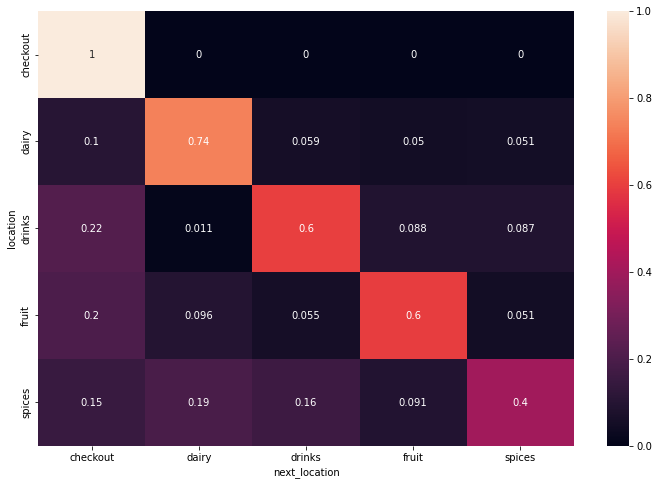

In [140]:
sns.heatmap(transition_probs,annot=True)

In [ ]:
# np.random.seed(42)
# state= 'dairy'
# for i in range(20):
# state = np.random.choice(['dairy','drinks','fruit','spices','checkout'], p=transition_probs.loc[state])

In [142]:
class Customer:
    def __init__(self,uniqueID,state,transition_probs):
        self.uniqueID=uniqueID
        self.state=state
        self.transition_probs=transition_probs
        
    def __repr__(self):
        return f'{self.uniqueID};{self.state}'
    
    def is_active(self):
        if self.state!='checkout':
            return True
        else:
            return False
        
    def next_state(self):
        self.state=np.random.choice(['checkout','dairy','drinks','fruit','spices'] ,p=transition_probs.loc[self.state])

In [143]:
new=Customer('monday1','drinks',transition_probs)
new

monday1;drinks

In [144]:
while new.is_active():
    new.next_state()
    print(new)

monday1;drinks
monday1;spices
monday1;spices
monday1;spices
monday1;checkout


In [145]:
class Supermarket:
    """manages multiple Customer instances that are currently in the market.
    """

    def __init__(self,transition_probs):        
        # a list of Customer objects
        self.customers = []
        self.last_id = 0
        self.minutes = 0
        
        

    def __repr__(self):
        return f'{self.current_time};{self.uniqueID};{self.state}'

    def get_time(self):
        """current time in HH:MM format,
        """
        self.open_time = pd.to_datetime('08:00',format='%H:%M')
        self.close_time = pd.to_datetime('17:00',format='%H:%M')
        self.current_time = pd.to_datetime('08:00',format='%H:%M')
        
        self.current_state = np.array([[self.current_time, customer.id, customer.state] for customer in self.customers])
        

    def print_customers(self):
        """print all customers with the current time and id in CSV format.
        """
        
        return f'{self.current_time};{self.uniqueID};{self.state}'

    def next_minute(self):
        """propagates all customers to the next state.
        """
        self.current_time += pd.Timedelta(1,'m')
        #self.customers = [customer.next_state() for customer in self.customers]
        for customer in self.customers:
            customer.next_state()
    
    def add_new_customers(self):
        """randomly creates new customers.
        """
        
    def remove_exitsting_customers(self):
        """removes every customer that is not active any more.
        """
        self.customers = [customer for customer in self.customers if customer.is_active() == True]

In [150]:
one = Supermarket(transition_probs)
one.remove_exitsting_customers()

In [151]:
one.get_time()
one.next_minute()